In [ ]:
# from sonpy import son

# help(son)
# f = son.File(filename)

# fid = open(filename)
# from numpy import fromfile
# fid.seek(0)

# fromfile(fid, 'h', 1)

# f.chan_list()


In [234]:
from neo.io import Spike2IO
import numpy as np

# f_name = '/mnt/papers/Herzfeld_Nat_Neurosci_2018/raw_data/2008_Random/Step/S30/error_magnitude/S30_1_45degErrorTest Lost CS short.smr'
f_name = '/mnt/papers/Herzfeld_Nat_Neurosci_2018/raw_data/2010_Adapt/Buckley_12deg/B091608/B091608_1218_Adapt.smr'
# f_name = '/mnt/data/herzfeldd/neurophys/robi_yoshiko/2006_P-cells/Oscar U88_1 two kinds of cs/OscarU88_1LFW5RBW5_c.smr'

reader = Spike2IO(filename=f_name)

In [ ]:
reader.read()

In [ ]:
print('Supported objects:')
Spike2IO.supported_objects

In [ ]:
print('Readable objects:')
Spike2IO.readable_objects

In [ ]:
seg = reader.read_segment()


In [ ]:
bl = reader.read_block()
sgs = bl.segments
sg = sgs[0]
sg.analogsignals


In [ ]:
st = seg.spiketrains[0]
print(st.annotations)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import matplotlib

In [ ]:
# Plot spike trains (Raster plot)

plt.figure(figsize=(18,1))
plt.eventplot(st)
plt.xlim((st.t_start, st.t_stop))

In [ ]:
print(st[-1])
print(st.t_stop)

In [220]:
from smr import File


In [235]:
fff = File(f_name)
fff.read_channels()

Not implemented (type = 6)
Not implemented (type = 6)
Not implemented (type = 6)
Not implemented (type = 5)
Not implemented (type = 5)


In [229]:
ch = fff.get_channel(0)
data = ch.data
print(data.shape)

(44179092,)


In [236]:
chans = fff.channels

for chan in chans:
    print("{}: {}".format(chan.channel_number , chan.comment))
    print('kind: {}'.format(chan.kind))
    print("{} ({})".format(chan.title , chan.units))
    print('--------------------')
    
# chans[0].__dict__

0: No comment
kind: 1
Unit (volts)
--------------------
1: No comment
kind: 1
HE (deg)
--------------------
2: No comment
kind: 1
VE (deg)
--------------------
3: No comment
kind: 1
HT (deg)
--------------------
4: No comment
kind: 1
VT (deg)
--------------------
7: No comment
kind: 1
H2 Targ (deg)
--------------------
8: No comment
kind: 1
V2 Targ (deg)
--------------------
9: No comment
kind: 1
Aux 1 (deg)
--------------------
10: No comment
kind: 1
Aux 2 (deg)
--------------------
12: No comment
kind: 6
Saved Eve ( Volt)
--------------------
16: No comment
kind: 3


AttributeError: Channel instance has no attribute 'units'

In [182]:
t = np.arange(0,data.shape[0])


array([      0,       1,       2, ..., 2868532, 2868533, 2868534])

In [ ]:
plt.figure(figsize=(30,2))

plt.plot(ch.data)



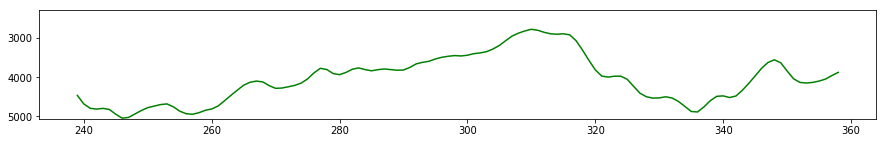

In [233]:
from matplotlib import pyplot as plt
from matplotlib import animation
from IPython.display import HTML

frame_l = 120

frame_interval = 1
maxn = 360

x = data[0 : maxn]
t = np.arange(0,x.shape[0])

ymax = np.max(x)
ymin = np.min(x)

counter = [0]

fig = plt.figure(figsize=(15 , 2))

def animate(n):
    plt.cla()
    line = plt.plot(t[ counter[-1] :  counter[-1] + frame_l], x[counter[-1] :  counter[-1] + frame_l], color='g')
    counter.append(n*frame_interval)
        
    
    plt.ylim(ymax, ymin)
    return line

anim = animation.FuncAnimation(fig, animate, frames=(maxn - frame_l)/frame_interval, interval=25)

HTML(anim.to_jshtml())

In [82]:
len(counter)

43